In [1]:
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://deeplearningcourses.com/c/bayesian-machine-learning-in-python-ab-testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

In [2]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit(object):
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1

    def pull(self):
        return np.random.random() < self.p

    def sample(self):
        return np.random.beta(self.a, self.b)

    def update(self, x):
        self.a += x
        self.b += 1 - x

In [3]:
def plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label="real p: %.4f" % b.p)
    plt.title("Bandit distributions after %s trials" % trial)
    plt.legend()
    plt.show()

current samples: ['0.5881', '0.9354', '0.7740']


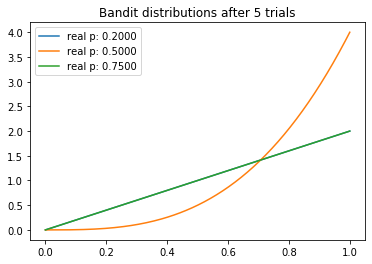

current samples: ['0.5452', '0.6229', '0.7320']


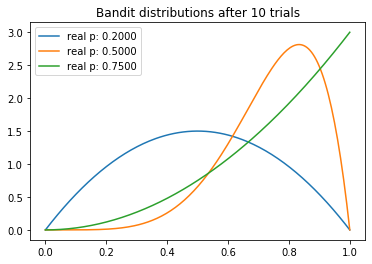

current samples: ['0.3508', '0.7656', '0.8507']


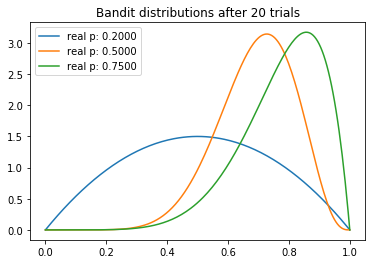

current samples: ['0.3923', '0.8699', '0.9250']


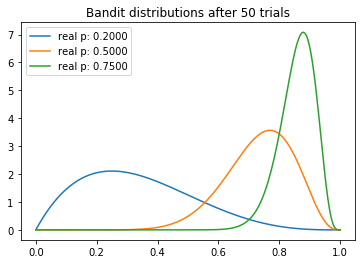

current samples: ['0.5883', '0.6074', '0.7669']


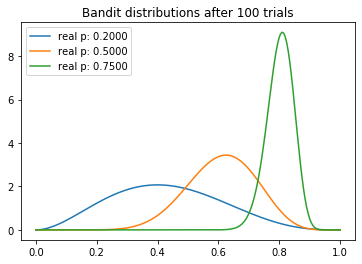

current samples: ['0.5275', '0.4845', '0.7152']


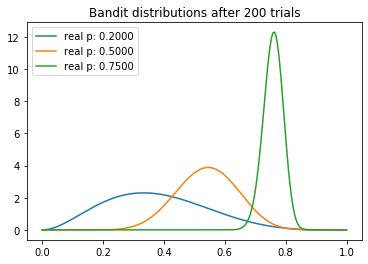

current samples: ['0.3295', '0.5511', '0.7355']


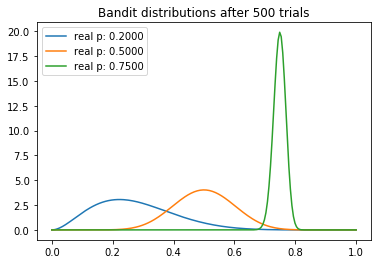

current samples: ['0.1136', '0.3486', '0.7165']


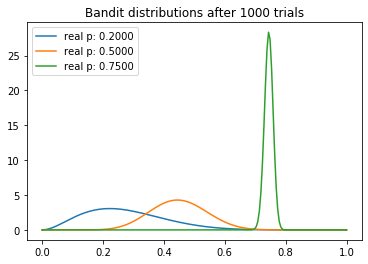

current samples: ['0.1891', '0.2899', '0.7509']


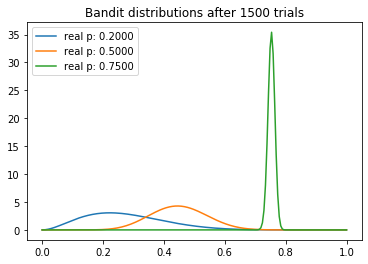

current samples: ['0.1383', '0.3654', '0.7819']


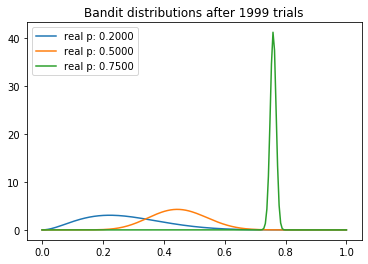

In [5]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
    for i in range(NUM_TRIALS):

        # take a sample from each bandit
        bestb = None
        maxsample = -1
        allsamples = [] # let's collect these just to print for debugging
        for b in bandits:
            sample = b.sample()
            allsamples.append("%.4f" % sample)
            if sample > maxsample:
                maxsample = sample
                bestb = b
        if i in sample_points:
            print("current samples: %s" % allsamples)
            plot(bandits, i)

        # pull the arm for the bandit with the largest sample
        x = bestb.pull()

        # update the distribution for the bandit whose arm we just pulled
        bestb.update(x)


if __name__ == "__main__":
    experiment()